In [1]:
import pandas as pd

df=pd.read_csv('IMDb movies.csv')

In [2]:
df.head

<bound method NDFrame.head of       imdb_title_id                           title  \
0         tt0000009                      Miss Jerry   
1         tt0000574     The Story of the Kelly Gang   
2         tt0001892                  Den sorte drøm   
3         tt0002101                       Cleopatra   
4         tt0002130                       L'Inferno   
...             ...                             ...   
85850     tt9908390                         Le lion   
85851     tt9911196  De Beentjes van Sint-Hildegard   
85852     tt9911774       Padmavyuhathile Abhimanyu   
85853     tt9914286               Sokagin Çocuklari   
85854     tt9914942      La vida sense la Sara Amat   

                       original_title  year date_published  \
0                          Miss Jerry  1894     1894-10-09   
1         The Story of the Kelly Gang  1906     26-12-1906   
2                      Den sorte drøm  1911     19-08-1911   
3                           Cleopatra  1912     13-11-1912   

In [3]:
df.isnull().sum(axis=0).sort_values(ascending=False) #NULL values in each column

metascore                72550
usa_gross_income         70529
budget                   62145
worlwide_gross_income    54839
reviews_from_critics     11797
reviews_from_users        7597
production_company        4455
description               2115
writer                    1572
language                   833
director                    87
actors                      69
country                     64
avg_vote                     0
votes                        0
duration                     0
genre                        0
date_published               0
year                         0
original_title               0
title                        0
imdb_title_id                0
dtype: int64

In [4]:
df.isnull().sum(axis=1).sort_values(ascending=False) #NULL values in each row

73517    11
53967    11
73518    11
74555    11
81425    11
         ..
69357     0
69359     0
43412     0
69361     0
60226     0
Length: 85855, dtype: int64

In [5]:
df.isnull().sum(axis=0).sort_values(ascending=False)/len(df) #Fraction of values that are NULL in each column

metascore                0.845029
usa_gross_income         0.821490
budget                   0.723837
worlwide_gross_income    0.638740
reviews_from_critics     0.137406
reviews_from_users       0.088486
production_company       0.051890
description              0.024635
writer                   0.018310
language                 0.009702
director                 0.001013
actors                   0.000804
country                  0.000745
avg_vote                 0.000000
votes                    0.000000
duration                 0.000000
genre                    0.000000
date_published           0.000000
year                     0.000000
original_title           0.000000
title                    0.000000
imdb_title_id            0.000000
dtype: float64

In [6]:
df.drop(['budget'],axis=1,inplace=True)
df.drop(['usa_gross_income'],axis=1,inplace=True)
df.drop(['worlwide_gross_income'],axis=1,inplace=True)
df.drop(['metascore'],axis=1,inplace=True)
df.drop(['reviews_from_critics'],axis=1,inplace=True)
df.drop(['reviews_from_users'],axis=1,inplace=True)
df.drop(['date_published'],axis=1,inplace=True)
df.shape

(85855, 15)

In [7]:
#Setting all the outliers to NaN
import numpy as np
outlier=['duration','year','votes','avg_vote']
for i in outlier:
    q1,q3=np.percentile(df[i],[20,80])
    iqr=q3-q1
    minimum=q1-(iqr*3)
    maximum=q3+(iqr*3)
    #assigning nan to the outliers
    df[i].iloc[df[df[i]<minimum].index]=np.nan
    df[i].iloc[df[df[i]>maximum].index]=np.nan
df.dropna(axis=0, inplace=True)
df.shape

c:\users\hp\appdata\local\programs\python\python38\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
c:\users\hp\appdata\local\programs\python\python38\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
c:\users\hp\appdata\local\programs\python\python38\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.or

(69084, 15)

<AxesSubplot:xlabel='duration'>

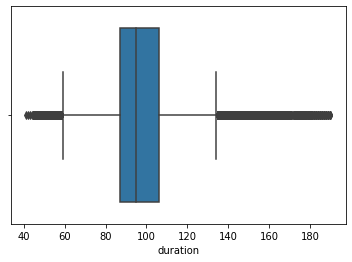

In [8]:
import seaborn as sb
sb.boxplot(x='duration',data=df)

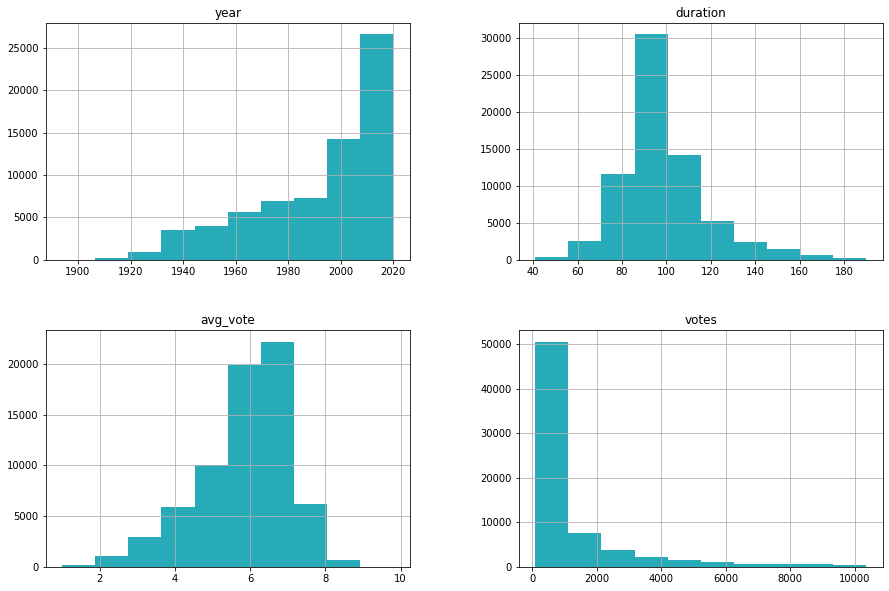

In [9]:
df.hist(figsize=(15,10), color="#28abb9");

Histogram plot of action movie ratings: 


<AxesSubplot:xlabel='avg_vote', ylabel='Count'>

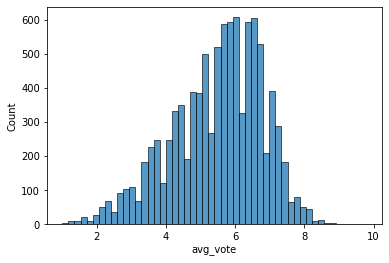

In [10]:
acm=df[df['genre'].str.contains('Action')]; print("Histogram plot of action movie ratings: ")sb.histplot(data=acm, x="avg_vote")

Histogram plot of runtimes of American movies: 


<AxesSubplot:xlabel='duration', ylabel='Count'>

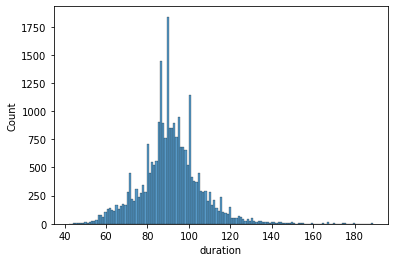

In [11]:
usm=df[df['country'].str.contains('USA')]; print("Histogram plot of runtimes of American movies: "); sb.histplot(data=usm, x="duration")

<AxesSubplot:xlabel='avg_vote', ylabel='Count'>

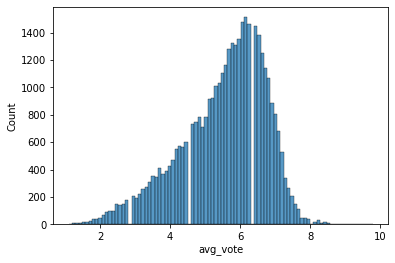

In [12]:
eng=df[df['language'].str.contains('English')]sb.histplot(data=eng,x='avg_vote')

In [13]:
df.language.value_counts()

English                                    29739
French                                      3583
Spanish                                     2482
Italian                                     2470
Japanese                                    2390
                                           ...  
English, German, Dutch, French, Spanish        1
Hungarian, Italian                             1
Basque, Spanish, English                       1
Japanese, English, Chinese                     1
Cantonese, Mandarin, Tagalog, English          1
Name: language, Length: 3468, dtype: int64

In [14]:
df.genre.value_counts()

Drama                        10648
Comedy                        6246
Comedy, Drama                 3257
Drama, Romance                2834
Comedy, Romance               2001
                             ...  
Romance, Drama, Adventure        1
Drama, Thriller, Sci-Fi          1
Crime, Film-Noir, Sport          1
Family, Fantasy, History         1
Crime, Mystery, Western          1
Name: genre, Length: 1212, dtype: int64

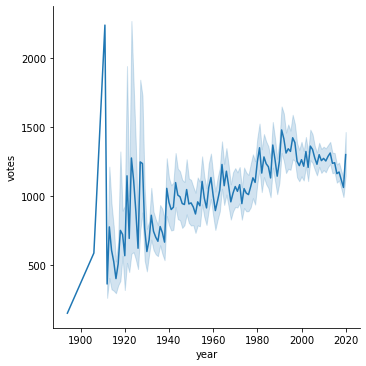

In [15]:
sb.relplot(x='year',y='votes',kind='line',data=df)

<AxesSubplot:xlabel='duration', ylabel='avg_vote'>

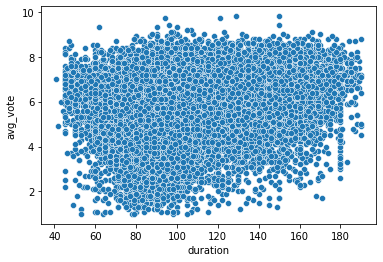

In [16]:
sb.scatterplot(data=df,x='duration',y='avg_vote')

<AxesSubplot:xlabel='genre', ylabel='avg_vote'>

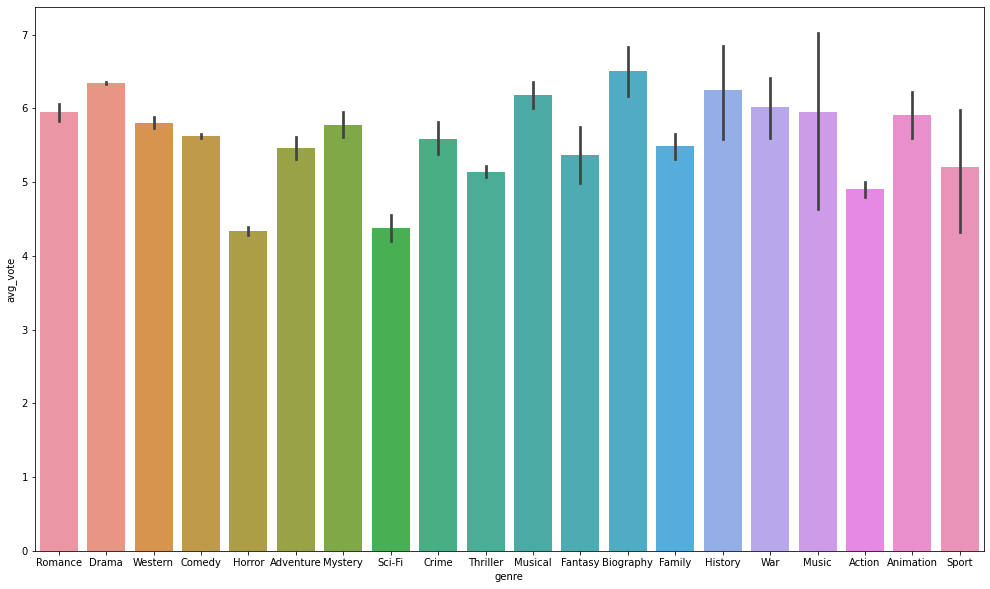

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=(17,10))
singlegnrs=df[~df['genre'].str.contains(',')]
sb.barplot(x='genre',y='avg_vote',data=singlegnrs)

<AxesSubplot:xlabel='country', ylabel='avg_vote'>

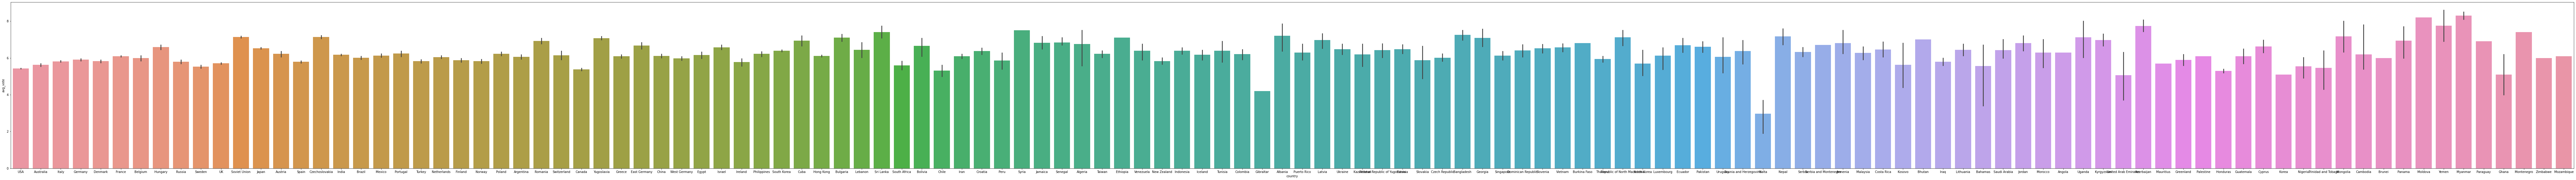

In [18]:
singlec=df[~df['country'].str.contains(',')]; plt.figure(figsize=(150,10))
sb.plotting_context(font_scale=72)
sb.barplot(x='country',y='avg_vote',data=singlec)

In [19]:
print('Duration(mean & variance):');
df.duration.mean()

Duration(mean & variance):


98.47007990272712

In [20]:
(df.duration.std())**2

379.77672010710216

In [21]:
print('Scores: \nMean:'); df.avg_vote.mean()

Scores: 
Mean:


5.831211279022639

In [22]:
print('\nVariance'); (df.avg_vote.std())**2



Variance


1.4532785524683547

In [23]:
print('No. of votes: \nMean:'); df.votes.mean()

No. of votes: 
Mean:


1174.2338891783916

In [24]:
print('\nVariance'); (df.votes.std())**2



Variance


3150456.1925049387

In [25]:
print('\nStandard deviation:'); df.votes.std()



Standard deviation:


1774.9524479559836

In [26]:
print('Release year: \nMean:'); int(df.year.mean())

Release year: 
Mean:


1992

In [27]:
print('\nVariance'); (df.year.std())**2


Variance


624.5936904869372

In [28]:
print('\nMedian:'); int(df.year.median())


Median:


2002

In [33]:
from sklearn import preprocessing
X=df[['votes','avg_vote','duration','year']]
scale=preprocessing.MinMaxScaler()
X=scale.fit_transform(X)
X=pd.DataFrame(X)
print(X.describe())

                  0             1             2             3
count  69084.000000  69084.000000  69084.000000  69084.000000
mean       0.104819      0.549001      0.385705      0.778981
std        0.173031      0.136991      0.130791      0.198348
min        0.000000      0.000000      0.000000      0.000000
25%        0.010041      0.477273      0.308725      0.642857
50%        0.033437      0.568182      0.362416      0.857143
75%        0.110255      0.647727      0.436242      0.944444
max        1.000000      1.000000      1.000000      1.000000


array([[<AxesSubplot:title={'center':'0'}>,
        <AxesSubplot:title={'center':'1'}>],
       [<AxesSubplot:title={'center':'2'}>,
        <AxesSubplot:title={'center':'3'}>]], dtype=object)

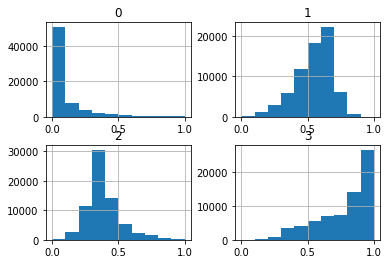

In [34]:
X.hist()

In [43]:
import random
print('Hypothesis testing: a random sample of movies will be drawn and their runtimes will be analyzed.')
print('Null hypothesis(H0): the average duration of a movie in the sample is below or equal to 100 minutes.')
print('Alternate hypothesis(H1): the average duration a movie in the sample is above 100 minutes.')
l1=random.randint(25000,30000)
l2=random.randint(45000,50000)
sample=df[l1:l2]
print('Sample: \n',sample.head(10))


Hypothesis testing: a random sample of movies will be drawn and their runtimes will be analyzed.
Null hypothesis(H0): the average duration of a movie in the sample is below or equal to 100 minutes.
Alternate hypothesis(H1): the average duration a movie in the sample is above 100 minutes.
Sample: 
       imdb_title_id                                            title  \
29596     tt0115920                                 Le coeur fantôme   
29597     tt0115925                 Color of a Brisk and Leaping Day   
29598     tt0115926                                     Come mi vuoi   
29599     tt0115927                                     Commandments   
29600     tt0115928  Comment je me suis disputé... (ma vie sexuelle)   
29601     tt0115929                             Como Nascem os Anjos   
29602     tt0115930                                Como un relámpago   
29603     tt0115931                              Compagna di viaggio   
29604     tt0115940                          Un ragaz

In [50]:
print(sample.shape,' ',sample.duration.mean(),' ',sample.duration.std())

(19865, 15)   100.38217971306318   19.751482164772277


In [51]:
'''The sample mean is 100.38 minutes; the sample size is 19865 movies, and the standard deviation= 19.75 minutes. 
We will choose a significance level of 0.05. The expected z-score is 1.645.'''
s_mean=sample.duration.mean(); s_sd=sample.duration.std(); n=19865;
z=(s_mean-100)/(s_sd/(n)**0.5)
print(z)


2.727170081348301


In [ ]:
'''The p-value is 1-0.9968=0.0032. As the null hypothesis seems very unlikely, we may reject it and conclude that the average
runtime of the movies in the set is over 100 minutes.'''


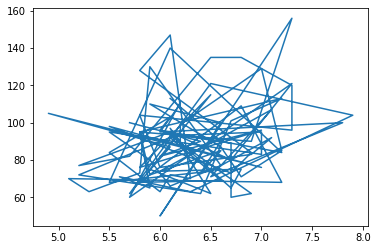

In [59]:
'''Correlation analysis: We must analyze the relationship between the average IMDB score of a movie and its duration'''
col1=df[500:600]['avg_vote']; col2=df[500:600]['duration']
plt.plot(col1,col2)

In [60]:
from scipy import stats
s,p=stats.spearmanr(col1,col2)
print('Stat: ',s,' p: ',p)


Stat:  0.21157709475090614  p:  0.0345874370809851
